In [1]:
import pandas as pd
import numpy as np
from BinaryClassifier import BinaryClassifier
from confusion_matrix import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Read from file
bc = BinaryClassifier()
X, y = bc.parse_training_data('dataset/clemens.csv')
X.head(5)

byte_0    byte_1    byte_2  \
alpha/000e7a224e5fa37bc3df900255f23b5a.code  0.186397  0.022845  0.011163   
alpha/004e65bf6f9e5e9f366960f3d45e65fc.code  0.145289  0.022447  0.027134   
alpha/004e02998883bbcc9b5b64759256c967.code  0.148570  0.019249  0.019015   
alpha/014ce83dae490361b8f813283728176a.code  0.175255  0.020153  0.011224   
alpha/015923dd5c7ef71682a74c593c86bfbb.code  0.178646  0.019531  0.010677   

                                               byte_3    byte_4    byte_5  \
alpha/000e7a224e5fa37bc3df900255f23b5a.code  0.006231  0.027259  0.009346   
alpha/004e65bf6f9e5e9f366960f3d45e65fc.code  0.003330  0.028367  0.007647   
alpha/004e02998883bbcc9b5b64759256c967.code  0.002943  0.033919  0.008316   
alpha/014ce83dae490361b8f813283728176a.code  0.004337  0.032143  0.010969   
alpha/015923dd5c7ef71682a74c593c86bfbb.code  0.006510  0.030469  0.009896   

                                               byte_6    byte_7    byte_8  \
alpha/000e7a224e5fa37bc3df900255f23b5a.code  0.003115  0.004673  0.008048   
alpha/004e65bf6f9e5e9f366960f3d45e65fc.code  0.003577  0.001233  0.006413   
alpha/004e02998883bbcc9b5b64759256c967.code  0.000748  0.002943  0.005606   
alpha/014ce83dae490361b8f813283728176a.code  0.004082  0.005357  0.008163   
alpha/015923dd5c7ef71682a74c593c86bfbb.code  0.002865  0.005729  0.008854   

                                               byte_9    ...     regex_38  \
alpha/000e7a224e5fa37bc3df900255f23b5a.code  0.001558    ...     1.000260   
alpha/004e65bf6f9e5e9f366960f3d45e65fc.code  0.000493    ...     1.000123   
alpha/004e02998883bbcc9b5b64759256c967.code  0.002102    ...     1.000047   
alpha/014ce83dae490361b8f813283728176a.code  0.001276    ...     1.000255   
alpha/015923dd5c7ef71682a74c593c86bfbb.code  0.001042    ...     1.000260   

                                             regex_39  regex_40  regex_41  \
alpha/000e7a224e5fa37bc3df900255f23b5a.code       0.0       0.0       0.0   
alpha/004e65bf6f9e5e9f366960f3d45e65fc.code       0.0       0.0       0.0   
alpha/004e02998883bbcc9b5b64759256c967.code       0.0       0.0       0.0   
alpha/014ce83dae490361b8f813283728176a.code       0.0       0.0       0.0   
alpha/015923dd5c7ef71682a74c593c86bfbb.code       0.0       0.0       0.0   

                                             regex_42  regex_43  regex_44  \
alpha/000e7a224e5fa37bc3df900255f23b5a.code       0.0       0.0  0.000000   
alpha/004e65bf6f9e5e9f366960f3d45e65fc.code       0.0       0.0  0.000000   
alpha/004e02998883bbcc9b5b64759256c967.code       0.0       0.0  0.000047   
alpha/014ce83dae490361b8f813283728176a.code       0.0       0.0  0.000000   
alpha/015923dd5c7ef71682a74c593c86bfbb.code       0.0       0.0  0.000000   

                                             regex_45  regex_46  regex_47  
alpha/000e7a224e5fa37bc3df900255f23b5a.code       0.0  0.000000       0.0  
alpha/004e65bf6f9e5e9f366960f3d45e65fc.code       0.0  0.000000       0.0  
alpha/004e02998883bbcc9b5b64759256c967.code       0.0  0.000047       0.0  
alpha/014ce83dae490361b8f813283728176a.code       0.0  0.000000       0.0  
alpha/015923dd5c7ef71682a74c593c86bfbb.code       0.0  0.000000       0.0  

[5 rows x 304 columns]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

In [4]:
# Cross validation
cv = cross_val_score(bc, X, y, n_jobs=-1, cv=5, scoring='f1_macro')
print("F1 (macro): %0.4f (+/- %0.4f)" % (cv.mean(), cv.std() * 2))

F1 (macro): 0.9923 (+/- 0.0216)


In [5]:
# Holdout testing
bc.fit(X_train, y_train)
report, confusion_matrix = bc.evaluate_test(X_test, y_test)

             precision    recall  f1-score   support

      alpha      1.000     0.999     0.999       781
      amd64      1.000     0.998     0.999       571
      arm64      0.993     1.000     0.996       697
      armel      1.000     0.998     0.999       551
      armhf      0.998     0.998     0.998       575
        avr      1.000     1.000     1.000        10
       cuda      1.000     0.923     0.960        13
       hppa      1.000     1.000     1.000       354
       i386      1.000     1.000     1.000       590
       ia64      1.000     1.000     1.000       397
       m68k      0.999     1.000     0.999       785
       mips      0.984     1.000     0.992       562
     mipsel      1.000     0.986     0.993       583
    powerpc      1.000     0.998     0.999       593
      ppc64      1.000     0.996     0.998       471
       s390      0.985     1.000     0.992       388
      s390x      1.000     0.997     0.999       398
        sh4      1.000     0.998     0.999   

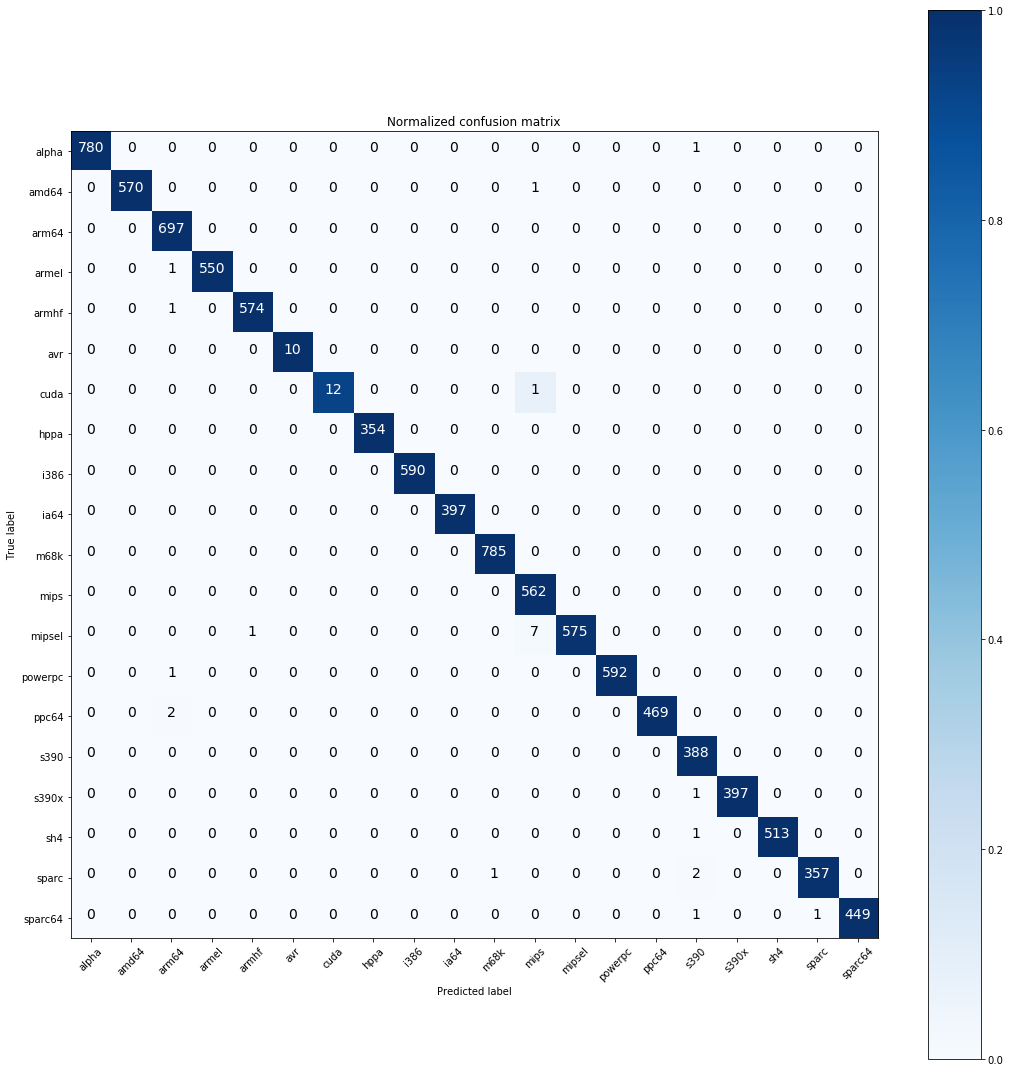

In [6]:
# Report of holdout testing
print(report)

# Confusion matrix
plot_confusion_matrix(confusion_matrix, classes=bc.classes_,
                      title='Normalized confusion matrix')

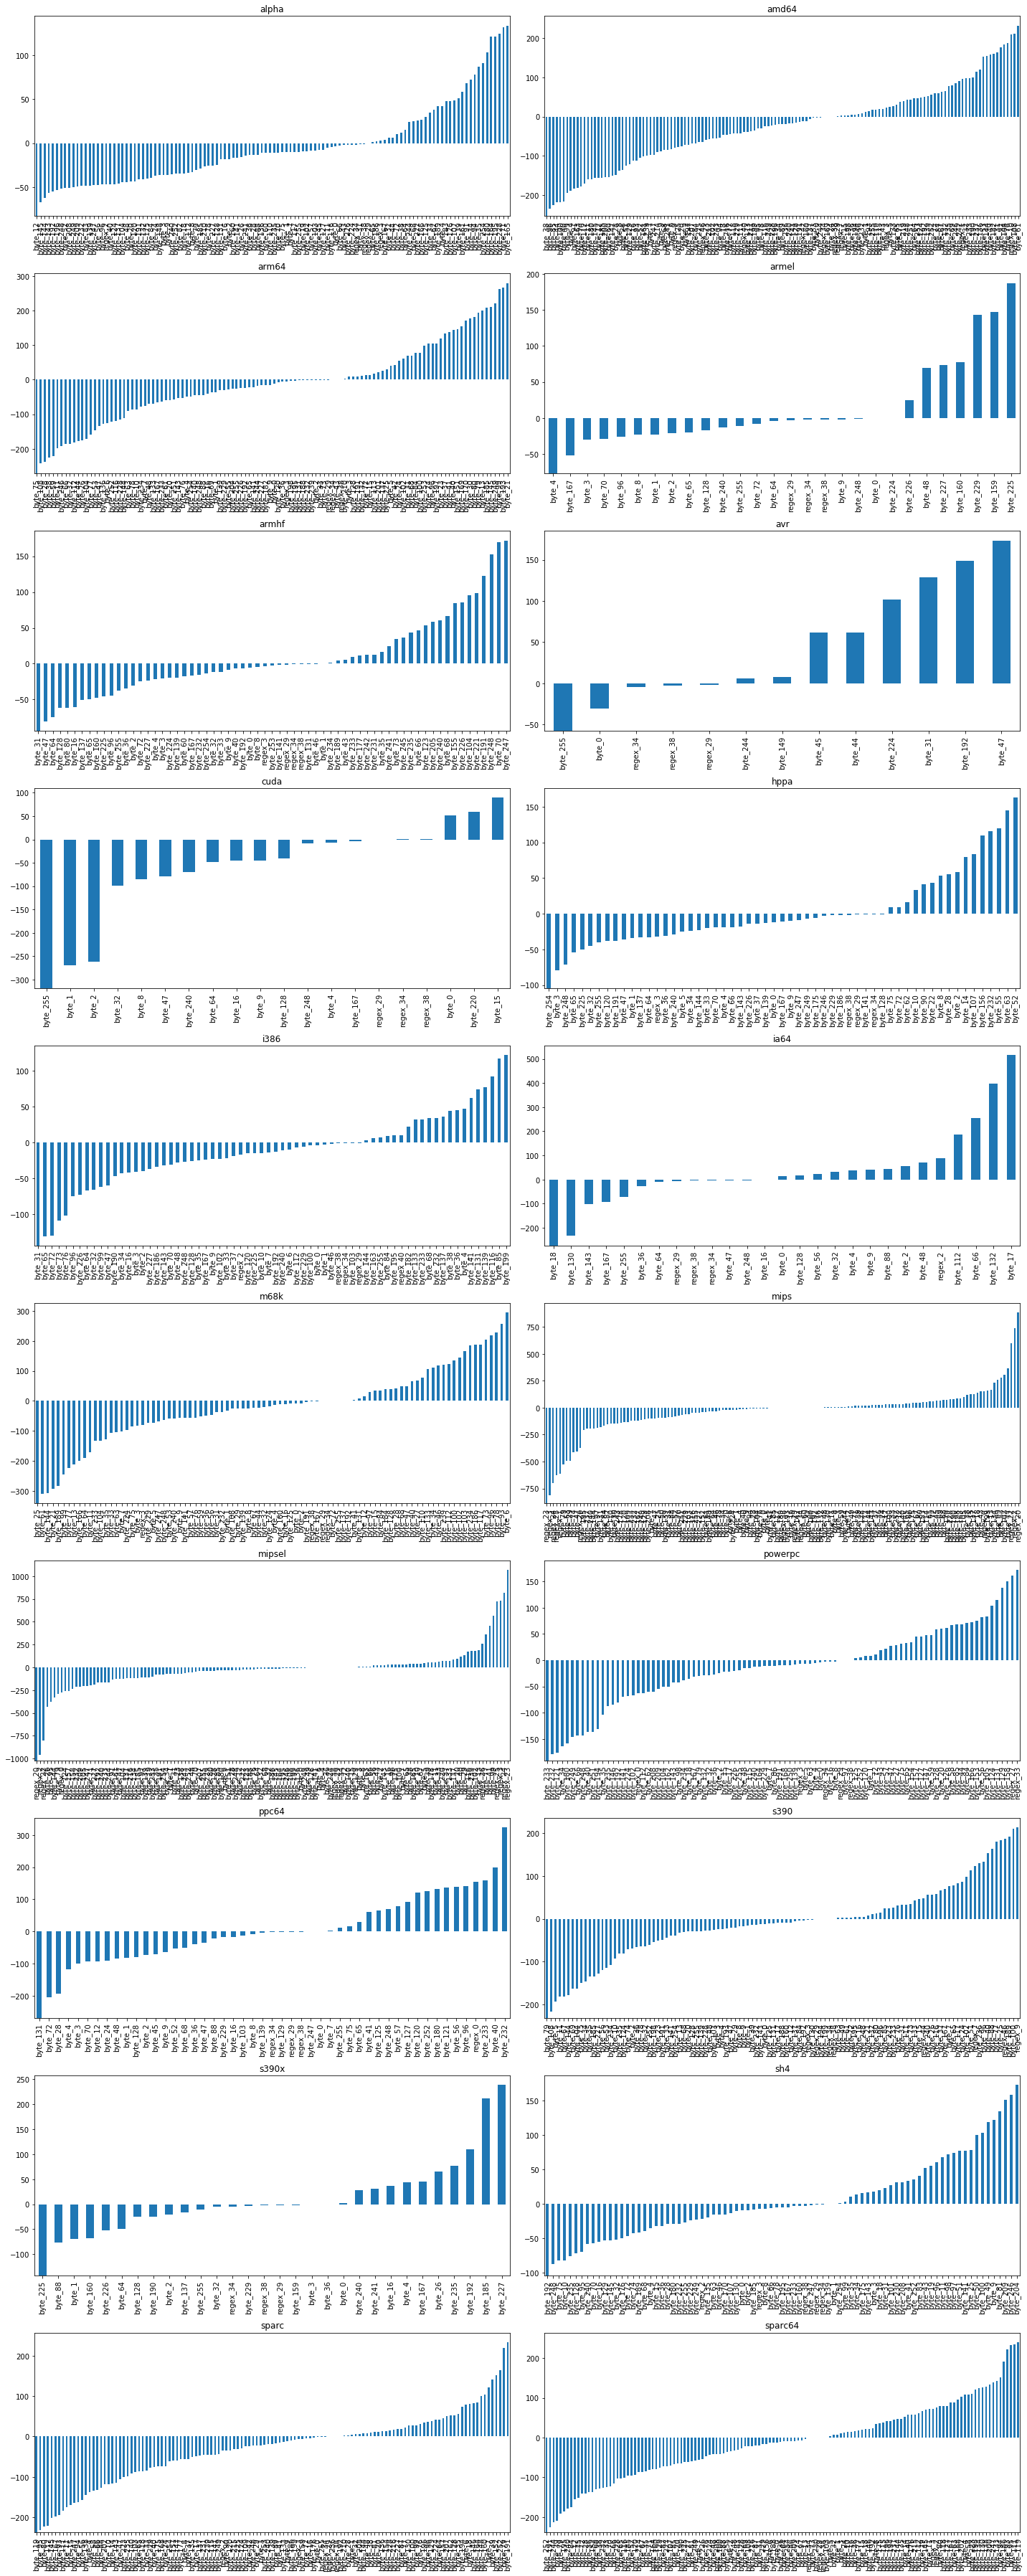

In [7]:
# Feature importance

fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(20,50))

for i, cls in enumerate(bc.classes_):
    importances, feat_names = bc.clf_.coef_[i], bc.get_feature_names()
    imp_df = pd.Series(importances, index=feat_names)
    imp_df = imp_df[imp_df != 0].sort_values()
    
    cur_ax = axes[i//2,i%2]
    cur_ax.set_title(cls)
    imp_df.plot.bar(ax=cur_ax)
    
fig.tight_layout()

In [8]:
# Print the probability of the most likely class of the test set
np.sort(bc.predict_proba(X_test).max(axis=1)).tolist()

[0.3145960092304027,
 0.3736196159475451,
 0.3807424348590721,
 0.3807424348590721,
 0.40542116257649446,
 0.4083442409270472,
 0.4556102579975242,
 0.4556102579975242,
 0.46777103256431496,
 0.4738488044429315,
 0.49229223000130184,
 0.5040490115054128,
 0.5112130878440256,
 0.5119736653283644,
 0.5207483529417994,
 0.5214064958608292,
 0.5247354879020644,
 0.5529879916363314,
 0.5571421697113209,
 0.5574685220757227,
 0.5689792343874196,
 0.5720674703071024,
 0.5781236557422822,
 0.5823526215349321,
 0.5844141512866121,
 0.6006762053392739,
 0.6088383322042316,
 0.6169297793703783,
 0.6205986591329269,
 0.6383771176814095,
 0.6498024501605169,
 0.6591744752274344,
 0.664539765087407,
 0.6656721294739637,
 0.6673543494410783,
 0.67029152761789,
 0.693138997944442,
 0.694547422881645,
 0.699692660804053,
 0.7066756606470221,
 0.7135298936508595,
 0.7374662547553447,
 0.7375066796640117,
 0.768141910338697,
 0.7719670486358612,
 0.7891142014252921,
 0.7995467460137894,
 0.80778551225032